In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# Define paths
train_dir = r'datasets\IPL_train'
val_dir = r'datasets\IPL_test'

# Load datasets
train_dataset = image_dataset_from_directory(train_dir, 
                                             batch_size=32, 
                                             image_size=(224, 224),
                                             label_mode='int')

val_dataset = image_dataset_from_directory(val_dir, 
                                           batch_size=32, 
                                           image_size=(224, 224),
                                           label_mode='int')

# Visualize some images
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


Found 4892 files belonging to 10 classes.
Found 868 files belonging to 10 classes.


In [12]:
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(class_names), activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

model = create_model()
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Define callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath=r'models\best_model.keras', save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
]

# Train the model
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=20,
                    callbacks=callbacks)


Epoch 1/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 84s 540ms/step - accuracy: 0.1905 - loss: 2.4253 - val_accuracy: 0.5357 - val_loss: 1.3213
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 85s 556ms/step - accuracy: 0.5441 - loss: 1.3105 - val_accuracy: 0.6578 - val_loss: 0.9747
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 85s 555ms/step - accuracy: 0.6608 - loss: 0.9847 - val_accuracy: 0.7235 - val_loss: 0.7555
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 82s 537ms/step - accuracy: 0.7381 - loss: 0.7478 - val_accuracy: 0.7431 - val_loss: 0.7078
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 82s 539ms/step - accuracy: 0.7806 - loss: 0.6266 - val_accuracy: 0.7800 - val_loss: 0.6431
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 83s 544ms/step - accuracy: 0.8255 - loss: 0.5121 - val_accuracy: 0.7650 - val_loss: 0.6179
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 82s 537ms/step - accuracy: 0.8518 - loss: 0.4197 - val_accuracy: 0.7915 - val_loss: 0.6015
Epoch 8/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 82s 536ms/step - accuracy: 0.8854 - loss: 0

In [14]:
# Load the best model
model.load_weights(r'models\best_model.keras')

# Evaluate on validation data
val_loss, val_acc = model.evaluate(val_dataset)
print(f'Validation Accuracy: {val_acc*100:.2f}%')


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.7793 - loss: 0.6298
Validation Accuracy: 79.15%


In [15]:
import os
os.makedirs('models', exist_ok=True)
model.save(r'models\IPL_Jersey_MM.keras')

In [7]:
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    predicted_class = class_names[tf.argmax(predictions[0])]
    confidence = tf.reduce_max(predictions[0])

    plt.imshow(img)
    plt.title(f"{predictions}\nPredicted: {predicted_class} ({confidence:.2%})")
    plt.axis('off')
    plt.show()

# Example usage
predict_image(r'rand_i\LSG.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


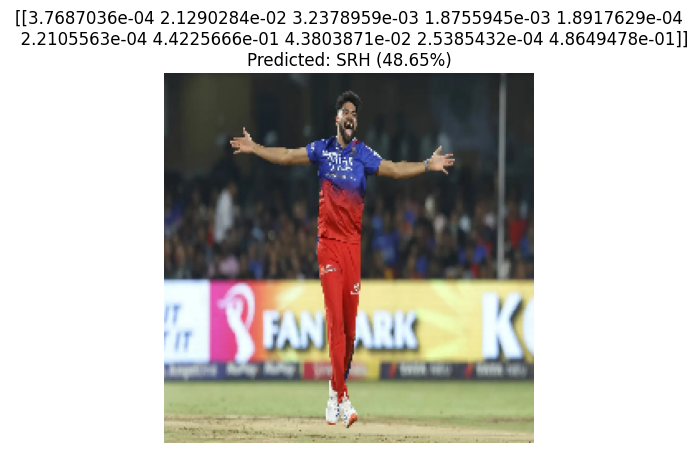

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


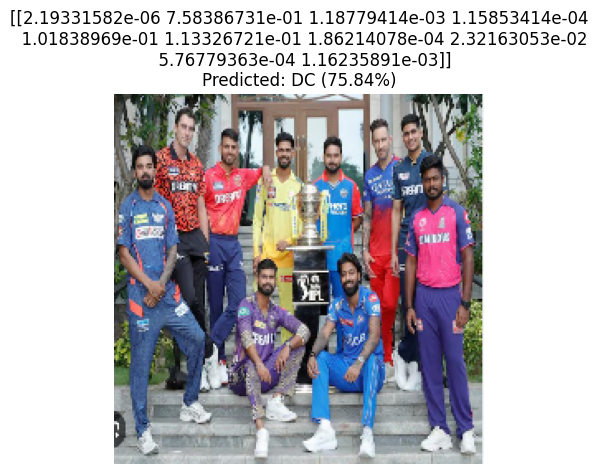

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


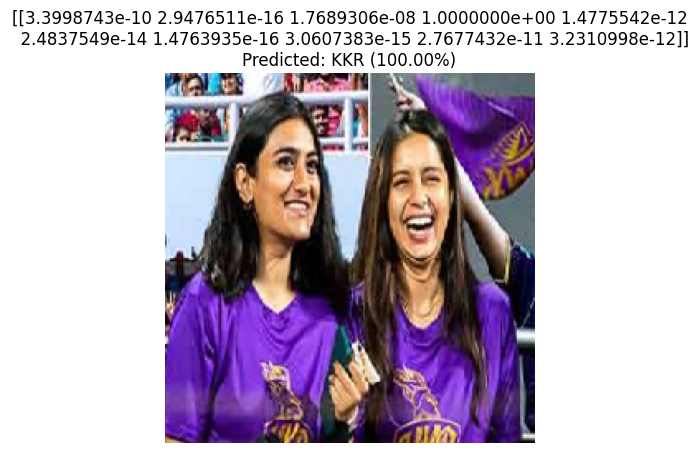

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


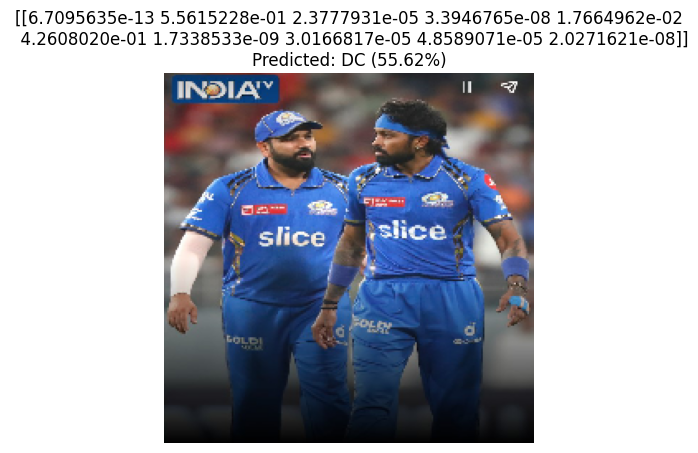

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


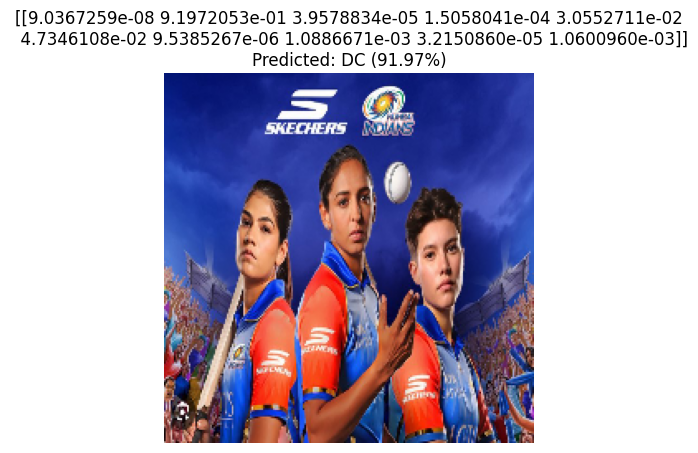

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


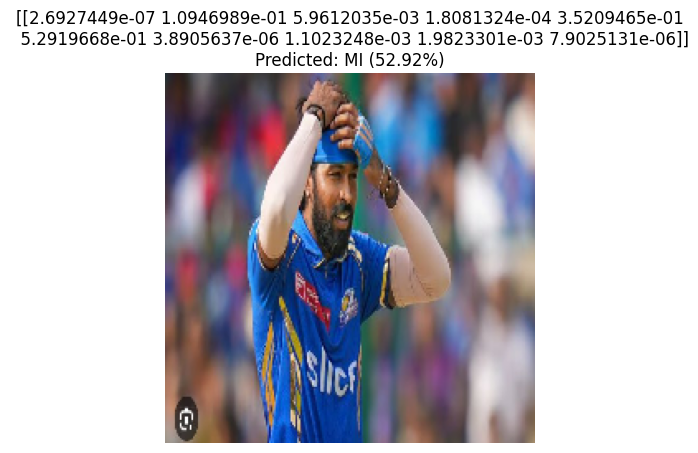

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


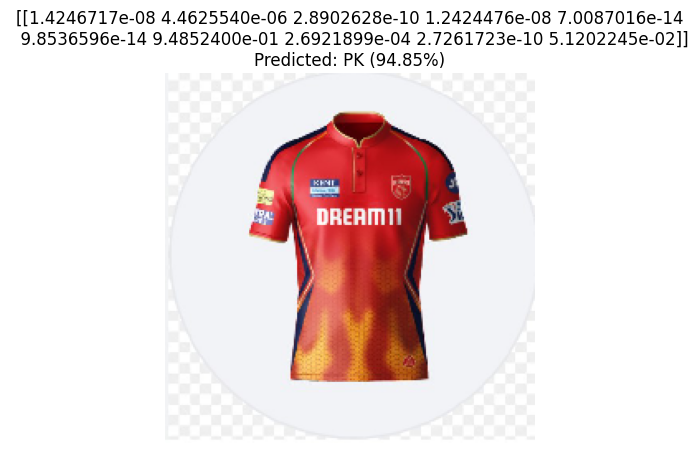

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


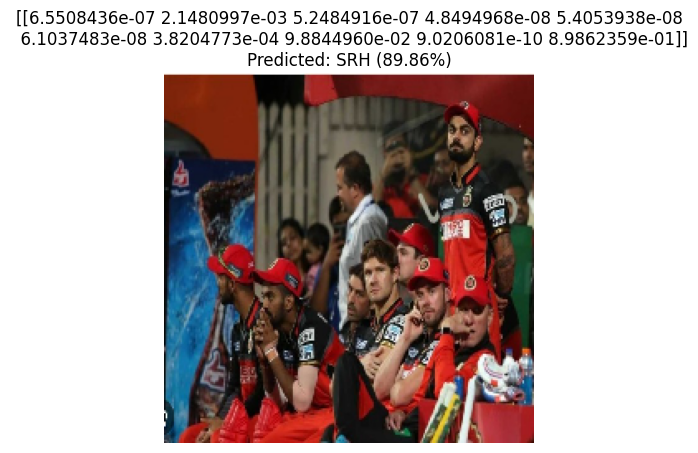

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


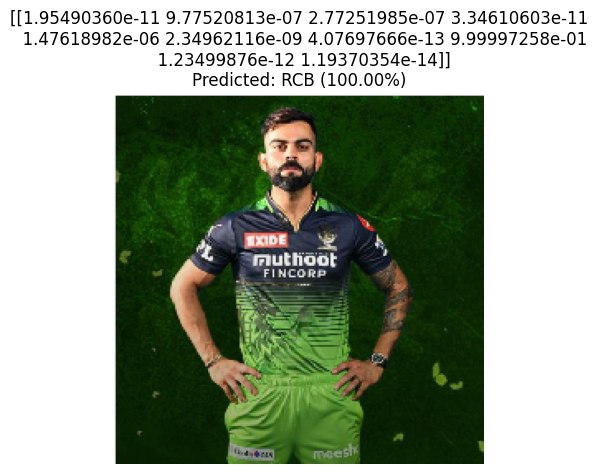

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


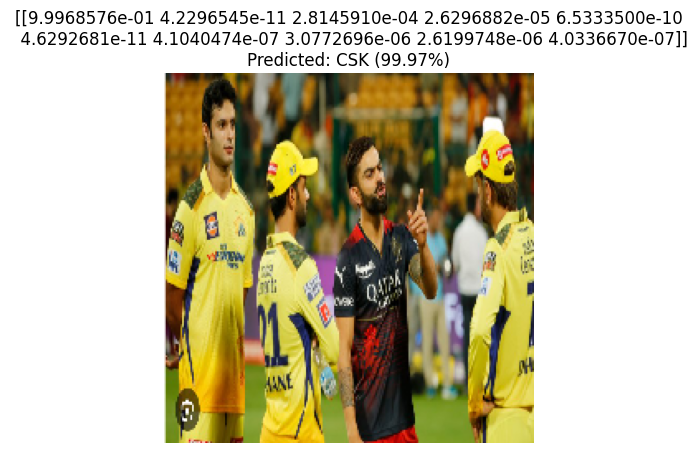

In [16]:
import os
for pic in os.listdir( 'rand_i' ):
    predict_image( os.path.join('rand_i', pic))